# Interactive Malthus Economy

In the first part of the project the **basic Malthus model** is implemented with interactive graphs, so it's possible to add shocks to the emount of land (X) and the technology level (A). In the second part of the project the model is **extended to include technological growth**.

**Time:** Discrete and represented by $ t \in {0,1,...,\infty} $

**Production function:** Cobb-Douglas
$$ Y_t = L_t^{1-\alpha}(AX)^\alpha $$
$A$ and $X$ are independent of time. $A$ is the technology-level and $X$ is the amount of land available.

The production function can also be written as production pr. capita, $y_t$, which is found by dividing the equation above by $L_t$:
$$ y_t = \frac{Y_t}{L_t} = (\frac{AX}{L_t})^\alpha $$

**Fertility curve:**
$$n_t = \frac{1-\beta}{\lambda}y_t (1-\tau)$$

In the equation for the fertility-curve the expression $1-\beta$ changes with preferences/culture about having children, $\lambda$ represents the lower costs of having children and $\tau$ represents taxes in society.


**Transition-equation:**
$$L_{t+1} = n_t L_t + (1-\mu) L_t$$
In the transition equation above $L_0$ is given.

A key assumption in the Malthus economy is that the birth rate, $n_t$, rises with income pr. capita, $y_t$, such that in steady state the birth rate is going to be: $$ n^* = \eta * y^* $$ $\eta$ is a positive parameter.

## Analytical solution to the Malthus model

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details.

In [10]:
import ModelClass
import sympy as sm
from IPython.display import display, Markdown

model = ModelClass.MalthusModel()

transition_eq = model.symbolic_L()

latex_with_code = r"$ \Large{ L_{t+1} = " + sm.latex(transition_eq) + r"}$"

print("To derieve the analytical steady state the transition equation describing the change in labor force will be used:")
display(Markdown(latex_with_code))

To derieve the analytical steady state the transition equation describing the change in labor force will be used:


$ \Large{ L_{t+1} = L_{t} \left(1 - \mu\right) + L_{t}^{1 - \alpha} \eta \left(A X\right)^{\alpha}}$

In [11]:
# Steady state expression for labor force
L_ss_symbolic = model.symbolic_ss_L()

latex_with_code = r"$ \Large{ L^{*} = " + sm.latex(L_ss_symbolic) + r"}$"

print("Steady state expression for the labor force:")
display(Markdown(latex_with_code))


# Steady state expression for output pr. worker
y_ss_symbolic = model.symbolic_ss_y()

latex_with_code = r"$ \Large{ y^{*} = " + sm.latex(y_ss_symbolic) + r"}$"

print("Steady state expression for output pr. worker:")
display(Markdown(latex_with_code))


Steady state expression for the labor force:


$ \Large{ L^{*} = \left(\frac{\eta \left(A X\right)^{\alpha}}{\mu}\right)^{\frac{1}{\alpha}}}$

Steady state expression for output pr. worker:


$ \Large{ y^{*} = \left(A X \left(\frac{\eta \left(A X\right)^{\alpha}}{\mu}\right)^{- \frac{1}{\alpha}}\right)^{\alpha}}$

It's possible to simplify the expression for $L^*$ and $y^*$ a lot more than what has been done in the above. Something with symbolic python is not very good at simplifying "complex" expressions.

### Turning the symbolic math steady state expressions into python functions using lambdify

In [12]:
# Labor force in steady state
labor_force_ss_func = model.symbolic_ss_L_lambdify()

values = model.val

labor_force_ss = labor_force_ss_func(values.technology, values.land, values.alpha, values.mu, values.eta)

print("State state labor force:", format(labor_force_ss, ".10f"))

State state labor force: 1256.7396638226


In [13]:
# Output pr. worker in steady state
output_pr_worker_ss_func = model.symbolic_ss_y_lambdify()

values = model.val

output_pr_worker_ss = output_pr_worker_ss_func(values.technology, values.land, values.alpha, values.mu, values.eta)

print("State state output pr. worker:", format(output_pr_worker_ss, ".10f"))

State state output pr. worker: 0.3428571429


## Numerical solution to the Malthus model

## **TODO: Beskriv hvilken optimerings-algorithme i har brugt.**

To begin with we find the amount of labor force, $L^*$, in the steady state.

In the code below we have used **optimize.root** in the scipy to find the optimal value of $L_t$ where the difference between $L_t$ and $L_{t+1}$ is equal to zero. In that scenario we have found the steady state value of $L^*$.

In the **ModelClass.py** the parameters for the model have been defined, as well as the functions for the model.

The model doesn't have any problem with convergence, but that is not surprising since it doesn't have multiple local minima which could "confuse" the optimization algorithm. However the optimization function **numerical_solution_steady_state** in the ModelClass has been implemented with **multi start**, so it should also be possible to find the global minima in case anyone wants to update the model where the optimization could be harder for the algorithm i.e. the case where there are multiple local minima.

In [14]:
model = ModelClass.MalthusModel()

labor_ss, output_ss, output_pr_worker_ss, birth_rate_ss, residual_ss = model.numerical_solution_steady_state()

print("Steady state value for labor force:", format(labor_ss[0], ".10f"))
print("Steady state value for output:", format(output_ss[0], ".10f"))
print("Steady state value for output pr. worker:", format(output_pr_worker_ss[0], ".10f"))
print("Steady state value for birth rate:", format(birth_rate_ss[0], ".10f"))
print("State state residual from the optimization algorithm:", format(residual_ss[0], ".10f"))

Steady state value for labor force: 1256.7396638227
Steady state value for output: 430.8821704535
Steady state value for output pr. worker: 0.3428571429
Steady state value for birth rate: 0.4500000000
State state residual from the optimization algorithm: -0.0000000000


### Comparing the analytical and numerical results in steady state

It can be seen that the steady state values are the same when using either the symbolic or the numerical solution to the Malthus model.

## The model visualized towards steady state

In [15]:
# Import to create plot
import matplotlib.pyplot as plt
import seaborn as sns

# Import to create widgets
import ipywidgets as widgets

# Import GraphHelper
import GraphHelper


# Function to update the transition to steady state
def update_transition_plots(alpha, beta, small_lambda, tau, mu, X_shock_size, A_shock_size, X_shock_time, A_shock_time):

    # Simulate values towards steady state
    (L, Y, y, X, A, n, _) = model.simulate_transition_ss(False, True, alpha, beta, small_lambda, tau, mu, X_shock_size, A_shock_size, X_shock_time, A_shock_time)

    # L Y plot
    L_Y_plot = GraphHelper.transition_to_ss_plot()
    L_Y_plot.plot(L, label="L", color='blue')
    L_Y_plot.plot(Y, label="Y", color='skyblue')
    L_Y_plot.title('Labor force (L) and output (Y)')
    L_Y_plot.legend(title='Series', loc='upper left')
    L_Y_plot.show()

    # y n plot
    y_n_plot = GraphHelper.transition_to_ss_plot()
    y_n_plot.plot(y, label="y", color='blue')
    y_n_plot.plot(n, label="n", color='skyblue')
    y_n_plot.title('Output pr. worker (y) and birth rate (n)')
    y_n_plot.legend(title='Series', loc='upper left')
    y_n_plot.show()

    # X A plot
    X_A_plot = GraphHelper.transition_to_ss_plot()
    X_A_plot.plot(X, label="X", linestyle=':', alpha=0.7, linewidth=2, color='blue')
    X_A_plot.plot(A, label="A", linestyle='-', alpha=0.7, linewidth=3, color='skyblue')
    X_A_plot.title('Land (X) and technology (A)')
    X_A_plot.legend(title='Series', loc='upper left')
    X_A_plot.show()


# Get values from model
val = model.val

# Sliders to adjust the parameters in the Malthus model
alpha_slider = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=model.val.alpha, description='Alpha', continuous_update=False)
beta_slider = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=model.val.beta, description='Beta', continuous_update=False)
small_lambda_slider = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=model.val.small_lambda, description='Lambda', continuous_update=False)
tau_slider = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=model.val.tau, description='Tau', continuous_update=False)
mu_slider = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=model.val.mu, description='Mu', continuous_update=False)

# Sliders to add shocks to the land and technology level in the economy
X_shock_size_slider = widgets.FloatSlider(min=0, max=2, step=0.05, value=0.8, description='X shock size', continuous_update=False)
X_shock_time_slider = widgets.FloatSlider(min=0.0, max=val.T, step=1, value=200, description='X shock time period', continuous_update=False)
A_shock_size_slider = widgets.FloatSlider(min=0, max=2, step=0.05, value=1.2, description='A shock size', continuous_update=False)
A_shock_time_slider = widgets.FloatSlider(min=0.0, max=val.T, step=1, value=300, description='A shock time period', continuous_update=False)

display(Markdown("### By using the slider below it's both possible to adjust the parameters in the Malthus economy and add shocks to both the amount of land (X) and the technology level (A) at different times."))

# Display slider widgets and plot
widgets.interactive(update_transition_plots, 
                    # Parameter sliders
                    alpha=alpha_slider, 
                    beta=beta_slider, 
                    small_lambda=small_lambda_slider, 
                    tau=tau_slider, 
                    mu=mu_slider, 
                    # Shock sliders
                    X_shock_size = X_shock_size_slider, 
                    X_shock_time = X_shock_time_slider,
                    A_shock_size = A_shock_size_slider,  
                    A_shock_time = A_shock_time_slider)


### By using the slider below it's both possible to adjust the parameters in the Malthus economy and add shocks to both the amount of land (X) and the technology level (A) at different times.

interactive(children=(FloatSlider(value=0.15, continuous_update=False, description='Alpha', max=1.0, step=0.01…

## Malthus model extended with technological growth

In the basic Malthus model it assumed that there is no technological growth. However the model can be extended to include technological growth, as Carl-Johan Dalgaard has done in a note called "A simple dynamic Malthusian model". When there is technolgical growth in the economy it means that $A_{t} \neq A_{t+1}$, but that there is a growth factor $\frac{A_{t+1}}{A_t}=g$.

Since technological growth leads to higher output ($Y_t$) which leads to a larger population ($L_t$) it means that $L_t$ will not converge to a steady state level. Instead a steady state in the modified model can be found by looking at:

$$ l_t = \frac{L_t}{A_t} $$

In this model project we're not going to derive the law of motion for the modified model, but note that the law of motion is the following:

$$ l_t = \eta * g^{-1} * l_{t}^{1-\alpha} * X^{\alpha} + g^{-1}*(1-\mu)*l_t $$

Where $l_0$ is given.

We have that the steady state equilibrium in the modified model is $l_{t+1}=l_t=l^*$.

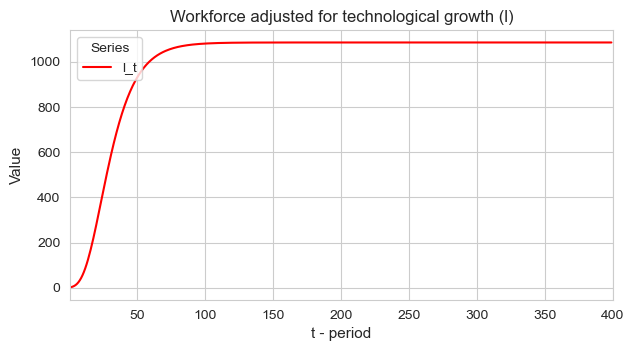

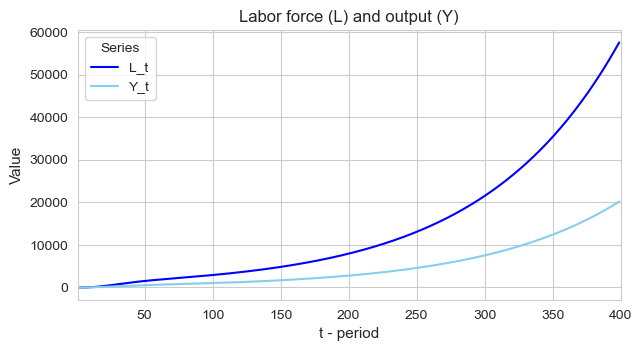

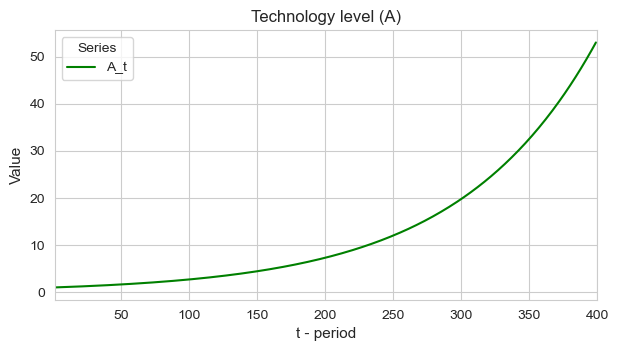

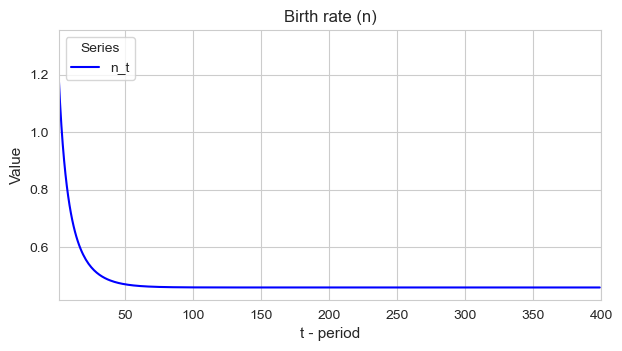

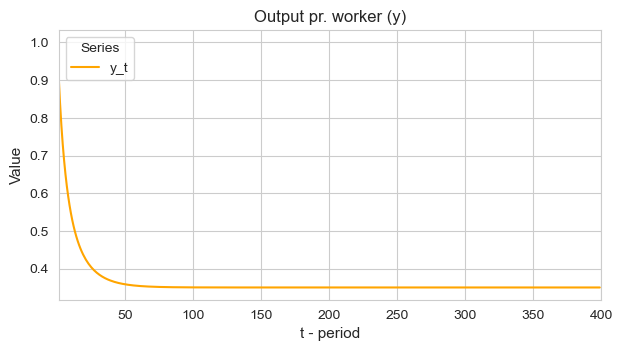

In [16]:
# Access model values
val = model.val

# Simulate values towards steady state
(L, Y, y, X, A, n, l) = model.simulate_transition_ss(True, False, val.alpha, val.beta, val.small_lambda, val.tau, val.mu, 0, 0, 0, 0)

# l plot
l_plot = GraphHelper.transition_to_ss_plot()
l_plot.plot(l, label="l_t", color='red')
l_plot.title('Workforce adjusted for technological growth (l)')
l_plot.legend(title='Series', loc='upper left')
l_plot.show()

# L Y plot
L_Y_plot = GraphHelper.transition_to_ss_plot()
L_Y_plot.plot(L, label="L_t", color='blue')
L_Y_plot.plot(Y, label="Y_t", color='skyblue')
L_Y_plot.title('Labor force (L) and output (Y)')
L_Y_plot.legend(title='Series', loc='upper left')
L_Y_plot.show()

# A plot
A_plot = GraphHelper.transition_to_ss_plot()
A_plot.plot(A, label="A_t", color='green')
A_plot.title('Technology level (A)')
A_plot.legend(title='Series', loc='upper left')
A_plot.show()

# n plot
n_plot = GraphHelper.transition_to_ss_plot()
n_plot.plot(n, label="n_t", color='blue')
n_plot.title('Birth rate (n)')
n_plot.legend(title='Series', loc='upper left')
n_plot.show()

# y plot
y_plot = GraphHelper.transition_to_ss_plot()
y_plot.plot(y, label="y_t", color='orange')
y_plot.title('Output pr. worker (y)')
y_plot.legend(title='Series', loc='upper left')
y_plot.show()